In [17]:
import vvmtool
import importlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
importlib.reload(vvmtool)
VVMTools = vvmtool.VVMTools
VVMTools = vvmtool.VVMTools

vvm = VVMTools("/data/mlcloud/pike/VVM/DATA/5_1hetero")
domain_u = (None, None, None, None, 0, 64)# (k1, k2, j1, j2, i1, i2)
domain_g = (None, None, None, None, 64, 128)#
domain = (None, None, None, None, 64, 128)#

####################

x = np.arange(0, 25600, 200)
y = np.arange(0, 25600, 200)
z = np.arange(0, 2000, 40)
t = np.arange(0, 480)
T, Z = np.meshgrid(t, z) 


print(vvm.VARTYPE)
#############################################################


AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

# Boundary Layer with Theta Flux


In [92]:


#BoundaryLayer
blTKE=vvm.blOther('TKE', 0.3, t, domain_range = domain)
blENS=vvm.blOther('ENS', 3e-5, t, domain_range = domain)
blWTH=vvm.blOther('WTH', 0.01, t, domain_range = domain)
blGrad=vvm.func_time_parallel(vvm.blGrad, t, domain_range = domain)
blPointfive=vvm.func_time_parallel(vvm.blPointfive, t, domain_range = domain)
WTH=vvm.func_time_parallel(vvm.cal_WTH, t, domain_range = domain)
WTH = np.swapaxes(WTH, 0, 1)





####################################################################################

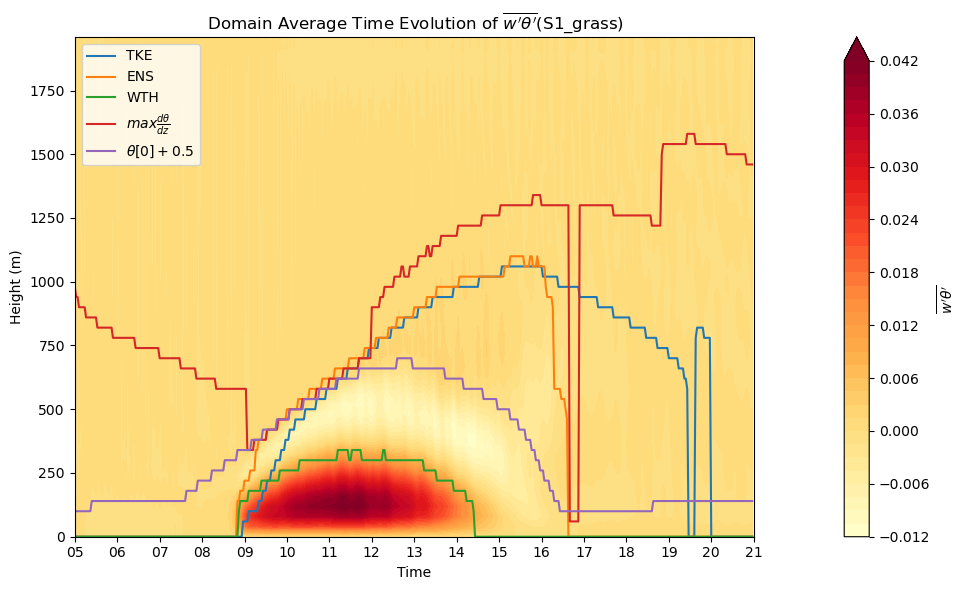

In [94]:
tick= np.arange(0,481,30)
lab = np.array(['05','06','07','08','09','10',
                    '11','12','13','14','15','16',
                    '17','18','19','20','21'])
plt.figure(figsize=(10, 6))
plt.contourf(T, Z, WTH, levels = 40 , extend='max', cmap ='YlOrRd')
plt.plot(t,blTKE, label = 'TKE')
plt.plot(t,blENS, label = 'ENS')
plt.plot(t,blWTH, label = 'WTH')
plt.plot(t,blGrad, label = r'$max \frac{d\theta}{dz}$')
plt.plot(t,blPointfive, label = r'$\theta[0] + 0.5$')
cbar = plt.colorbar(pad=0.1, label =r'$\overline{w^\prime \theta^\prime}$')
plt.xlabel('Time') 
plt.ylabel('Height (m)')  
plt.xticks(tick, lab) 
plt.title(r' Domain Average Time Evolution of $\overline{w^\prime \theta^\prime}$(S1_grass) ')
plt.tight_layout()
plt.legend()
plt.savefig('s1grass.png')
plt.show()

In [3]:
tr01 = vvm.get_var_parallel('tr01', 
                         t, # array or list of time
                         domain_range=(None, None, None, None, None, None),  # (k1, k2, j1, j2, i1, i2)
                         compute_mean=False,
                         axis= (1,2), # axis for mean. e.g. (0, 1)
                         cores=5)


NameError: name 'vvm' is not defined